In [2]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [3]:
import os
cwd = os.getcwd()
print(cwd)

c:\Users\YWANG\cpfl-python\fets_2022\Challenge\Task_1


In [4]:
partition_1_path = os.path.join(cwd,'openfl-workspace','fets_challenge_workspace','partitioning_1.csv')
partition_2_path = os.path.join(cwd,'openfl-workspace','fets_challenge_workspace','partitioning_2.csv')
print(partition_1_path)
print(partition_2_path)

c:\Users\YWANG\cpfl-python\fets_2022\Challenge\Task_1\openfl-workspace\fets_challenge_workspace\partitioning_1.csv
c:\Users\YWANG\cpfl-python\fets_2022\Challenge\Task_1\openfl-workspace\fets_challenge_workspace\partitioning_2.csv


In [5]:
df_1 = pd.read_csv(partition_1_path)
df_2 = pd.read_csv(partition_2_path)
num_samples_1 = len(df_1['Partition_ID'])
num_cols_1 = df_1['Partition_ID'][num_samples_1-1]
num_samples_2 = len(df_2['Partition_ID'])
num_cols_2 = df_2['Partition_ID'][num_samples_2-1]
print('Partition_1: {} collaborators have {} data samples'.format(num_cols_1,num_samples_1))
print('Partition_2: {} collaborators have {} data samples'.format(num_cols_2,num_samples_2))

Partition_1: 23 collaborators have 1251 data samples
Partition_2: 33 collaborators have 1251 data samples


In [6]:
all_cols_1 = ['col_'+str(i) for i in range(num_cols_1)]
all_cols_2 = ['col_'+str(i) for i in range(num_cols_2)]

[511.   6.  15.  47.  22.  34.  12.   8.   4.   8.  14.  11.  35.   6.
  13.  30.   9. 382.   4.  33.  35.  12.]
[170. 170. 171.   6.  15.  16.  15.  16.  22.  34.  12.   8.   4.   8.
  14.  11.  12.  11.  12.   6.  13.  30.   9. 127. 127. 128.   4.  33.
  12.  11.  12.  12.]


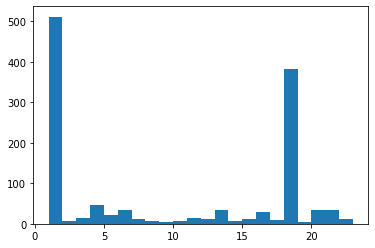

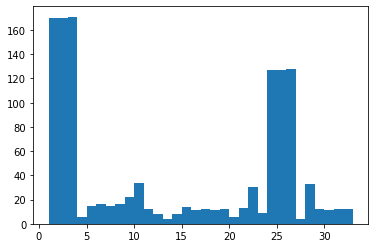

In [7]:
plt.figure()
num_1, _, _ = plt.hist(df_1['Partition_ID'],bins=np.arange(1,num_cols_1+1,1))
# plt.xticks(np.arange(1,num_cols_1+1,1))
print(num_1)
plt.figure()
num_2, _, _ = plt.hist(df_2['Partition_ID'],bins=np.arange(1,num_cols_2+1,1))
print(num_2)

In [8]:
print(np.median(num_1))
print(np.median(num_2))

13.5
12.5


Design a mechahism to find collaborators to be excluded permanently

In [9]:
def find_exclusion(num, threshold=10):
    small_cols = np.argwhere(num<=threshold)
    exclusion = []
    for i in small_cols:
        exclusion.append('col_'+str(i[-1]))
        # print('col_'+str(i[-1]))
    return exclusion

In [10]:
excl_1 = find_exclusion(num_1, 10)
excl_2 = find_exclusion(num_2, 10)
print(excl_1)
print(excl_2)

['col_1', 'col_7', 'col_8', 'col_9', 'col_13', 'col_16', 'col_18']
['col_3', 'col_11', 'col_12', 'col_13', 'col_19', 'col_22', 'col_26']


In [11]:
print(np.argsort(num_1))
print(np.argsort(num_2))

[18  8  1 13  7  9 16 11 21  6 14 10  2  4 15 19  5 12 20  3 17  0]
[26 12  3 19 11 13 22 15 29 17 28 18 16 30 31 10 20 14  6  4  7  5  8 21
 27  9 23 24 25  1  0  2]


In [12]:
def remove_col(all_cols, exclusion_list):
    for col in exclusion_list:
        all_cols.remove(col)

In [13]:
# remove_col(all_cols_1, excl_1)
# remove_col(all_cols_2, excl_2)
# print(all_cols_1)
# print(all_cols_2)

Find collaborators to be preserved

In [14]:
def find_preserved(num, threshold=10):
    big_cols = np.argwhere(num>=threshold)
    preserved_col_id = []
    for i in big_cols:
        preserved_col_id.append(int(i[-1]))
        # print('col_'+str(i[-1]))
    return preserved_col_id

In [15]:
preservation_1 = find_preserved(num_1, 10)
preservation_2 = find_preserved(num_2, 10)
print(preservation_1)
print(preservation_2)

[0, 2, 3, 4, 5, 6, 10, 11, 12, 14, 15, 17, 19, 20, 21]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31]


In [16]:
preserved_col_1 = [all_cols_1[i] for i in preservation_1]
preserved_col_2 = [all_cols_2[i] for i in preservation_2]
print(preserved_col_1)
print(preserved_col_2)

['col_0', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_10', 'col_11', 'col_12', 'col_14', 'col_15', 'col_17', 'col_19', 'col_20', 'col_21']
['col_0', 'col_1', 'col_2', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_20', 'col_21', 'col_23', 'col_24', 'col_25', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31']


Use the number of training sample as the basis of probability to be selected, then pick a subset of collaborators from the preserved ones randomly

In [17]:
prob_of_select_1 = np.array([num_1[i] for i in preservation_1])
prob_of_select_1 = prob_of_select_1/prob_of_select_1.sum()
print(prob_of_select_1)
prob_of_select_2 = np.array([num_2[i] for i in preservation_2])
prob_of_select_2 = prob_of_select_2/prob_of_select_2.sum()
print(prob_of_select_2)

[0.42371476 0.01243781 0.03897181 0.01824212 0.02819237 0.00995025
 0.01160862 0.00912106 0.02902156 0.01077944 0.02487562 0.31674959
 0.02736318 0.02902156 0.00995025]
[0.14096186 0.14096186 0.14179104 0.01243781 0.013267   0.01243781
 0.013267   0.01824212 0.02819237 0.00995025 0.01160862 0.00912106
 0.00995025 0.00912106 0.00995025 0.01077944 0.02487562 0.1053068
 0.1053068  0.10613599 0.02736318 0.00995025 0.00912106 0.00995025
 0.00995025]


In [21]:
prob_of_select_2

array([0.14096186, 0.14096186, 0.14179104, 0.01243781, 0.013267  ,
       0.01243781, 0.013267  , 0.01824212, 0.02819237, 0.00995025,
       0.01160862, 0.00912106, 0.00995025, 0.00912106, 0.00995025,
       0.01077944, 0.02487562, 0.1053068 , 0.1053068 , 0.10613599,
       0.02736318, 0.00995025, 0.00912106, 0.00995025, 0.00995025])

In [19]:
rng = np.random.default_rng(35)
num_final_pick = 10
randmoly_picked_1 = rng.choice(preservation_1, num_final_pick, replace=False, p=prob_of_select_1)
randmoly_picked_2 = rng.choice(preservation_2, num_final_pick, replace=False, p=prob_of_select_2)
print(randmoly_picked_1)
print(randmoly_picked_2)

[ 0  3 19 17 20  5 21 10  2  4]
[20 18  0 23  1  2 25 28 30  9]


In [20]:
randmoly_picked_1

array([ 0,  3, 19, 17, 20,  5, 21, 10,  2,  4])